**Title:**

*Contributors: Tom Mitchell, Jason Liu, Kevin Zhang, Ethan Yen, Vijay Jayasuriya*

**1. Introduction:**

In this project, we will be looking at data from businesses in America. We will try to predict the stars based on select features. Specifically, we will train a machine learning model that can predict the stars.

**2. Data Collection**

In [1]:
import pandas as pd
import numpy as np
import ast
import json

**Converting JSON into a dataframe and csv**

In [2]:
# Filepath for the json version of the dataset
json_filepath = "yelp_academic_dataset_business.json"

# Reading the JSON file (weird since each line is a separate JSON object)
df = pd.read_json(json_filepath, lines=True)

# Normalizing the nested JSON parts and readding them as multiple columns
df_attributes = pd.json_normalize(df["attributes"])
df_hours = pd.json_normalize(df["hours"])
df = df.drop(["attributes", "hours"], axis=1)
df = pd.concat([df, df_attributes, df_hours], axis=1)

# Saving the dataframe to a csv file
df.to_csv("temp.csv")

**General Features of the Dataset**

Printing out the dimensions, attributes and their types, and first rows of the dataframe. The issues with the columns mentioned above can be seen here.

In [3]:
print(df.shape)
print(df.dtypes)
df.head()

(100000, 58)
business_id                    object
name                           object
address                        object
city                           object
state                          object
postal_code                    object
latitude                      float64
longitude                     float64
stars                         float64
review_count                    int64
is_open                         int64
categories                     object
ByAppointmentOnly              object
BusinessAcceptsCreditCards     object
BikeParking                    object
RestaurantsPriceRange2         object
CoatCheck                      object
RestaurantsTakeOut             object
RestaurantsDelivery            object
Caters                         object
WiFi                           object
BusinessParking                object
WheelchairAccessible           object
HappyHour                      object
OutdoorSeating                 object
HasTV                          object

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,RestaurantsCounterService,AgesAllowed,DietaryRestrictions,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,...,NaN,NaN,NaN,0:0-0:0,8:0-18:30,8:0-18:30,8:0-18:30,8:0-18:30,8:0-14:0,NaN
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,...,NaN,NaN,NaN,8:0-22:0,8:0-22:0,8:0-22:0,8:0-22:0,8:0-23:0,8:0-23:0,8:0-22:0
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,NaN,NaN,NaN,7:0-20:0,7:0-20:0,7:0-20:0,7:0-20:0,7:0-21:0,7:0-21:0,7:0-21:0
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,...,NaN,NaN,NaN,NaN,NaN,14:0-22:0,16:0-22:0,12:0-22:0,12:0-22:0,12:0-18:0


**3. Data Cleaning**

Let us clean the data by columns. the **is_open** column tells users if the location is closed permanently. We should only analyze the businesses that are still in operation.

In [4]:
df = df[df["is_open"] == 1]
df.drop("is_open", axis=1, inplace=True)
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,RestaurantsCounterService,AgesAllowed,DietaryRestrictions,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,...,NaN,NaN,NaN,0:0-0:0,8:0-18:30,8:0-18:30,8:0-18:30,8:0-18:30,8:0-14:0,NaN
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,NaN,NaN,NaN,7:0-20:0,7:0-20:0,7:0-20:0,7:0-20:0,7:0-21:0,7:0-21:0,7:0-21:0
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,...,NaN,NaN,NaN,NaN,NaN,14:0-22:0,16:0-22:0,12:0-22:0,12:0-22:0,12:0-18:0
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,...,NaN,NaN,NaN,0:0-0:0,6:0-22:0,6:0-22:0,6:0-22:0,9:0-0:0,9:0-22:0,8:0-22:0
6,n_0UpQx1hsNbnPUSlodU8w,Famous Footwear,"8522 Eager Road, Dierbergs Brentwood Point",Brentwood,MO,63144,38.627695,-90.340465,2.5,13,...,NaN,NaN,NaN,0:0-0:0,10:0-18:0,10:0-18:0,10:0-18:0,10:0-18:0,10:0-18:0,12:0-18:0


After normalizing the **attributes** and **hours** features, the dataframe gained a significant number of columns (one for each possible attribute and one for each day of the week).

We'll handle the attribute columns first. Let's start with the **ByAppointmentOnly** column.

In [5]:
df["ByAppointmentOnly"].unique()

array([nan, 'False', 'True', 'None'], dtype=object)

We will assume all null values mean it is not by appointment only. This pattern of values is very common in this dataframe, so we will first look for columns with this pattern, and default missing values to False.

In [6]:
pattern = set(df["ByAppointmentOnly"].unique())
matching = []
for col_name in df.columns:
    if set(df[col_name].unique()).issubset(pattern):
        matching.append(col_name)

Now we will replace all null values with False.

In [7]:
mapping = {
    "False" : False,
    "None"  : False,
    "True"  : True
}
for col in matching:
    df[col] = df[col].map(mapping)
    df[col].fillna(False, inplace=True)

C:\Users\ethan\AppData\Local\Temp\ipykernel_14680\2334224800.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(False, inplace=True)
C:\Users\ethan\AppData\Local\Temp\ipykernel_14680\2334224800.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col].fillna(False, inplace=True)
C:\Users\ethan

We proceed looking for problematic columns.

In [8]:
attribute_cols = df.columns[11:50]
remaining = [x for x in attribute_cols if x not in matching]
remaining

['RestaurantsPriceRange2',
 'WiFi',
 'BusinessParking',
 'Alcohol',
 'RestaurantsAttire',
 'Ambience',
 'NoiseLevel',
 'GoodForMeal',
 'Smoking',
 'Music',
 'BestNights',
 'BYOBCorkage',
 'HairSpecializesIn',
 'AgesAllowed',
 'DietaryRestrictions']

In [9]:
df["RestaurantsPriceRange2"].unique()

array([nan, '1', '2', '3', '4', 'None'], dtype=object)

This column tells us how expensive a restaurant is on a scale from 1-4. We are simply going to fill missing data with the average pricing.

In [10]:
price_mapping = {
    "1" : 1,
    "2" : 2,
    "3" : 3,
    "4" : 4
}

df["RestaurantsPriceRange2"] = df["RestaurantsPriceRange2"].map(price_mapping)
df["RestaurantsPriceRange2"].replace("None", np.nan, inplace=True)
mean = df["RestaurantsPriceRange2"].mean()
df["RestaurantsPriceRange2"].fillna(mean, inplace=True)

remaining.remove("RestaurantsPriceRange2")

C:\Users\ethan\AppData\Local\Temp\ipykernel_14680\1404852848.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["RestaurantsPriceRange2"].replace("None", np.nan, inplace=True)
C:\Users\ethan\AppData\Local\Temp\ipykernel_14680\1404852848.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [11]:
df["WiFi"].unique()

array([nan, "u'free'", "u'no'", "'free'", "'no'", 'None', "u'paid'",
       "'paid'"], dtype=object)

Let's assume that null values for the **WiFi** column means the venue does not have wifi. Additionally, after research, the *"u"* entries were simply data entered when Yelp used Python 2. We will clean this to only have values of: none, free, paid. There are also *"None"* entries throughout, which we will replace with *"none"*. Additionally, this pattern runs for multiple columns.

In [12]:
def clean_entry(x):
    if isinstance(x, str):
        if (x.startswith("u'") and x.endswith("'")) or (x.startswith('u"') and x.endswith('"')):
            return x[2:-1]
        elif (x.startswith("'") and x.endswith("'")) or (x.startswith('"') and x.endswith('"')):
            return x[1:-1]
        elif x == "None":
            return "none"
    return x

pattern = ["WiFi", "Alcohol", "RestaurantsAttire", "NoiseLevel", "Smoking", "BYOBCorkage", "AgesAllowed"]

for col in pattern:
    df[col] = df[col].apply(clean_entry)
    df[col] = df[col].fillna("none")

rem = [x for x in remaining if x not in pattern]
rem

['BusinessParking',
 'Ambience',
 'GoodForMeal',
 'Music',
 'BestNights',
 'HairSpecializesIn',
 'DietaryRestrictions']

In [13]:
df["BusinessParking"].unique()

array([nan,
       "{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}",
       "{'garage': None, 'street': None, 'validated': None, 'lot': True, 'valet': False}",
       'None',
       "{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}",
       "{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}",
       "{'garage': None, 'street': False, 'validated': None, 'lot': True, 'valet': False}",
       "{u'valet': False, u'garage': None, u'street': True, u'lot': False, u'validated': None}",
       "{'garage': True, 'street': False, 'validated': False, 'lot': False, 'valet': False}",
       "{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}",
       "{'garage': False, 'street': True, 'validated': True, 'lot': True, 'valet': False}",
       "{u'valet': False, u'garage': False, u'street': False, u'lot': True, u'validated': False}",
       "{u'valet': False, u'gara

We will clean this by editing the data so that each entry only includes the type parking it has, and null values will be assumed to have zero parking. The rest of the columns follow this format, so we will clean them together.

In [14]:
def clean_boolean_keys(x):
    x = str(x)
    try:
        parsed = ast.literal_eval(x)
    except Exception:
        return "none"
    
    if not isinstance(parsed, dict):
        return "none"
    
    true_keys = [key for key, value in parsed.items() if value is True]
    return " ".join(true_keys) if true_keys else "none"

for col in rem:
    df[col] = df[col].apply(clean_boolean_keys)

df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,RestaurantsCounterService,AgesAllowed,DietaryRestrictions,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,...,False,none,none,0:0-0:0,8:0-18:30,8:0-18:30,8:0-18:30,8:0-18:30,8:0-14:0,NaN
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,False,none,none,7:0-20:0,7:0-20:0,7:0-20:0,7:0-20:0,7:0-21:0,7:0-21:0,7:0-21:0
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,...,False,none,none,NaN,NaN,14:0-22:0,16:0-22:0,12:0-22:0,12:0-22:0,12:0-18:0
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,...,False,none,none,0:0-0:0,6:0-22:0,6:0-22:0,6:0-22:0,9:0-0:0,9:0-22:0,8:0-22:0
6,n_0UpQx1hsNbnPUSlodU8w,Famous Footwear,"8522 Eager Road, Dierbergs Brentwood Point",Brentwood,MO,63144,38.627695,-90.340465,2.5,13,...,False,none,none,0:0-0:0,10:0-18:0,10:0-18:0,10:0-18:0,10:0-18:0,10:0-18:0,12:0-18:0


Now let us clean the hours columns. 

In [15]:
def format_time(time):
        hour, minute = time.split(':')
        return f"{int(hour):02d}:{int(minute):02d}"

def convert_hours(x):
    if pd.isna(x) or x == "0:0-0:0":
        return "none"
    
    open, close = x.split('-')
    
    return (format_time(open), format_time(close))

days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

for day in days:
    df[day] = df[day].apply(convert_hours)
     
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,RestaurantsCounterService,AgesAllowed,DietaryRestrictions,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,...,False,none,none,none,"(08:00, 18:30)","(08:00, 18:30)","(08:00, 18:30)","(08:00, 18:30)","(08:00, 14:00)",none
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,False,none,none,"(07:00, 20:00)","(07:00, 20:00)","(07:00, 20:00)","(07:00, 20:00)","(07:00, 21:00)","(07:00, 21:00)","(07:00, 21:00)"
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,...,False,none,none,none,none,"(14:00, 22:00)","(16:00, 22:00)","(12:00, 22:00)","(12:00, 22:00)","(12:00, 18:00)"
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,...,False,none,none,none,"(06:00, 22:00)","(06:00, 22:00)","(06:00, 22:00)","(09:00, 00:00)","(09:00, 22:00)","(08:00, 22:00)"
6,n_0UpQx1hsNbnPUSlodU8w,Famous Footwear,"8522 Eager Road, Dierbergs Brentwood Point",Brentwood,MO,63144,38.627695,-90.340465,2.5,13,...,False,none,none,none,"(10:00, 18:00)","(10:00, 18:00)","(10:00, 18:00)","(10:00, 18:00)","(10:00, 18:00)","(12:00, 18:00)"


**Data Visualization (checkpoint 2)**

C:\Users\ethan\AppData\Local\Temp\ipykernel_14680\3989136766.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rc_bin', y='stars', data=df, ax=plot, palette='viridis')
C:\Users\ethan\AppData\Local\Temp\ipykernel_14680\3989136766.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = df.groupby('rc_bin')['stars'].mean()


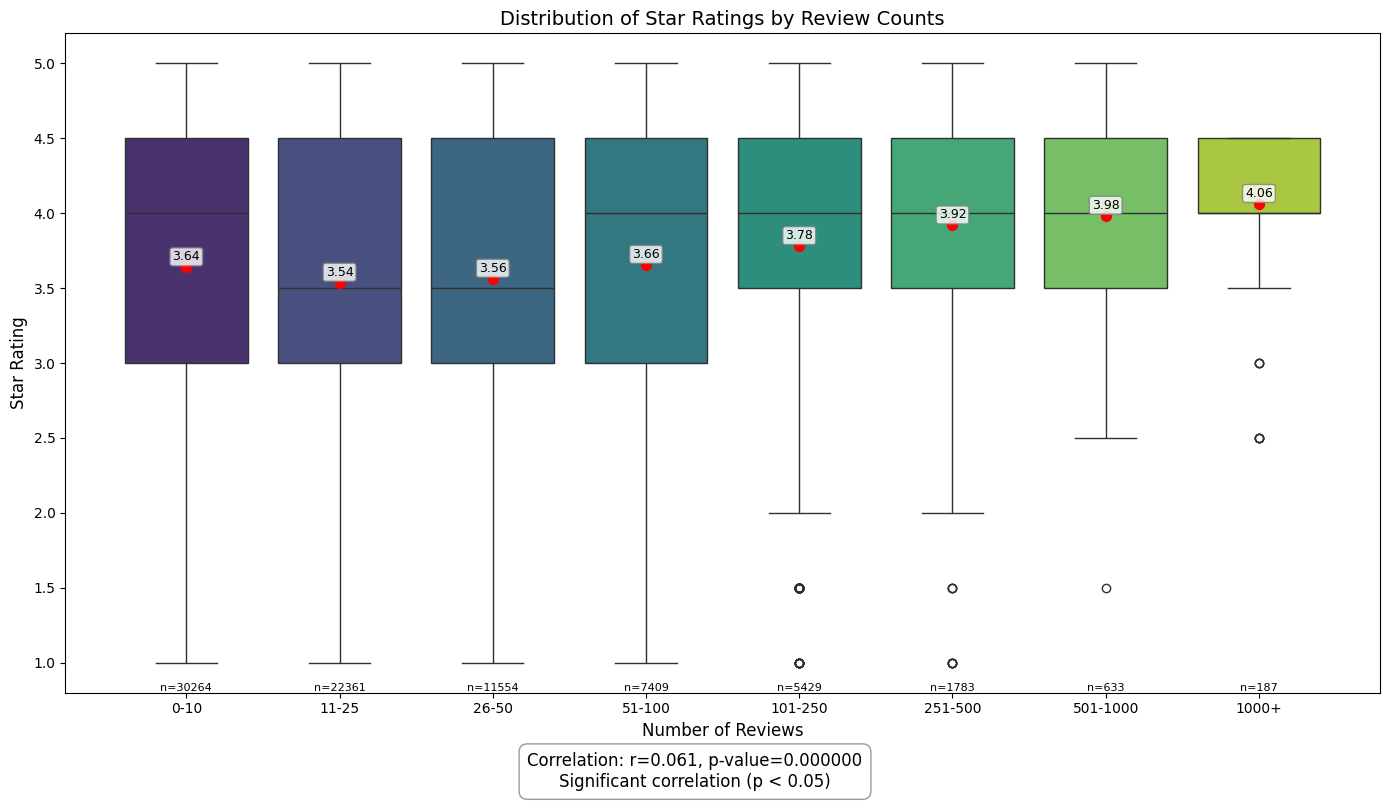

Correlation coefficient: 0.061
p-value: 0.000000
Interpretation: Significant correlation (p < 0.05)


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
import pandas as pd
import statsmodels

corr, p_value = stats.pearsonr(df['review_count'], df['stars'])

bins = [0, 10, 25, 50, 100, 250, 500, 1000, np.inf]
labels = ['0-10', '11-25', '26-50', '51-100', '101-250', '251-500', '501-1000', '1000+']
df['rc_bin'] = pd.cut(df['review_count'], bins=bins, labels=labels)

fig, plot = plt.subplots(figsize=(14, 8))

sns.boxplot(x='rc_bin', y='stars', data=df, ax=plot, palette='viridis')
plot.set_xlabel('Number of Reviews', fontsize=12)
plot.set_ylabel('Star Rating', fontsize=12)
plot.set_title('Distribution of Star Ratings by Review Counts', fontsize=14)

means = df.groupby('rc_bin')['stars'].mean()
for i, mean_val in enumerate(means):
    plot.scatter(i, mean_val, color='red', s=50, zorder=3)
    plot.annotate(f'{mean_val:.2f}', (i, mean_val), 
                xytext=(0, 5), textcoords='offset points', ha='center', fontsize=9,
                bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="gray", alpha=0.8))

counts = df['rc_bin'].value_counts().sort_index()
for i, count in enumerate(counts):
    plot.annotate(f'n={count}', (i, df['stars'].min()), xytext=(0, -20), textcoords='offset points', ha='center', fontsize=8)

if p_value < 0.05:
    correlation = "Significant correlation (p < 0.05)"
else:
    correlation = "No significant correlation (p ≥ 0.05)"

fig.text(0.5, 0.01, 
         f"Correlation: r={corr:.3f}, p-value={p_value:.6f}\n" + f"{correlation}", 
         ha='center', fontsize=12,
         bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="gray", alpha=0.8))

plt.tight_layout(rect=[0, 0.05, 1, 1]) 
plt.show()

print(f"Correlation coefficient: {corr:.3f}")
print(f"p-value: {p_value:.6f}")
print(f"Interpretation: {correlation}")

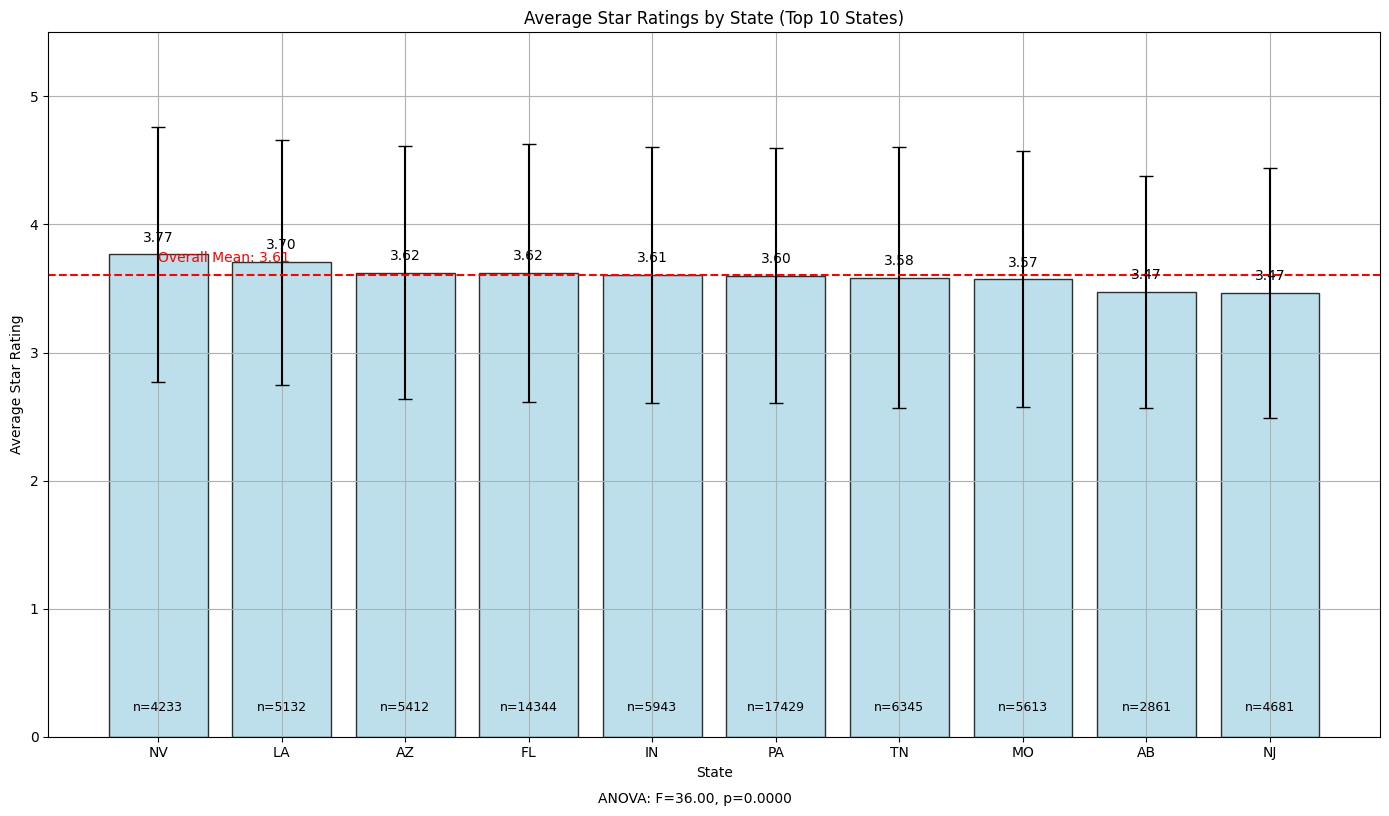

ANOVA F-statistic: 35.995
p-value: 0.000000
There are significant differences between states

Tukey's HSD Post-hoc Test:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    AB     AZ   0.1537    0.0  0.0812  0.2262   True
    AB     FL   0.1526    0.0  0.0884  0.2169   True
    AB     IN   0.1351    0.0  0.0637  0.2065   True
    AB     LA   0.2343    0.0  0.1611  0.3075   True
    AB     MO   0.1012 0.0004  0.0292  0.1733   True
    AB     NJ  -0.0039    1.0 -0.0784  0.0705  False
    AB     NV   0.2955    0.0  0.2196  0.3714   True
    AB     PA    0.129    0.0  0.0657  0.1923   True
    AB     TN   0.1129    0.0  0.0423  0.1836   True
    AZ     FL  -0.0011    1.0 -0.0511   0.049  False
    AZ     IN  -0.0186 0.9925 -0.0775  0.0404  False
    AZ     LA   0.0806 0.0012  0.0195  0.1417   True
    AZ     MO  -0.0525 0.1443 -0.1122  0.0073  False
    AZ     NJ  -0.1576    0.0 -

In [17]:
top_states = df['state'].value_counts().head(10).index.tolist()
df_ts = df[df['state'].isin(top_states)]


state_stats = df_ts.groupby('state')['stars'].agg(['mean', 'std', 'count']).reset_index()
state_stats = state_stats.sort_values('mean', ascending=False)

groups = [df_ts[df_ts['state'] == state]['stars'] for state in top_states]
f_stat, p_value = stats.f_oneway(*groups)

fig, ax = plt.subplots(figsize=(14, 8))

bars = ax.bar(
    state_stats['state'], 
    state_stats['mean'], 
    yerr=state_stats['std'], 
    capsize=5, 
    color='lightblue', 
    alpha=0.8,
    edgecolor='black'
)

for i, bar in enumerate(bars):
    height = bar.get_height()
    count = state_stats['count'].iloc[i]
    ax.text(
        bar.get_x() + bar.get_width()/2, 
        height + 0.1, 
        f'{height:.2f}',
        ha='center', 
        fontsize=10
    )
    ax.text(
        bar.get_x() + bar.get_width()/2, 
        0.2, 
        f'n={count}',
        ha='center', 
        fontsize=9,
        color='black'
    )

ax.set_xlabel('State')
ax.set_ylabel('Average Star Rating')
ax.set_title('Average Star Ratings by State (Top 10 States)')
ax.set_ylim(0, 5.5)
ax.grid(True)

total_mean = df_ts['stars'].mean()
ax.axhline(y=total_mean, color='red', linestyle='--')
ax.text(0, total_mean+0.1, f'Overall Mean: {total_mean:.2f}', color='red')

result_text = f"ANOVA: F={f_stat:.2f}, p={p_value:.4f}"
plt.figtext(0.5, -0.01, result_text, ha='center')

plt.tight_layout()
plt.show()

print(f"ANOVA F-statistic: {f_stat:.3f}")
print(f"p-value: {p_value:.6f}")

if p_value < 0.05:
    result_text += "\nSignificant differences between states (p < 0.05)"
    print("There are significant differences between states")
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    
    tukey_data = []
    for state, group in zip(top_states, groups):
        for value in group:
            tukey_data.append([state, value])
    
    tukey_df = pd.DataFrame(tukey_data, columns=['state', 'stars'])
    
    tukey_result = pairwise_tukeyhsd(tukey_df['stars'], tukey_df['state'], alpha=0.05)
    
    print("\nTukey's HSD Post-hoc Test:")
    print(tukey_result)
else:
    result_text += "\nNo significant differences between states (p >= 0.05)"
    


Number of restaurants: 23271
Price ranges: [1.         1.76885663 2.         3.         4.        ]
Alcohol options: ['none' 'full_bar' 'beer_and_wine']


<>:39: SyntaxWarning: invalid escape sequence '\$'
<>:39: SyntaxWarning: invalid escape sequence '\$'
<>:39: SyntaxWarning: invalid escape sequence '\$'
<>:39: SyntaxWarning: invalid escape sequence '\$'
<>:39: SyntaxWarning: invalid escape sequence '\$'
<>:39: SyntaxWarning: invalid escape sequence '\$'
<>:39: SyntaxWarning: invalid escape sequence '\$'
<>:39: SyntaxWarning: invalid escape sequence '\$'
C:\Users\ethan\AppData\Local\Temp\ipykernel_14680\2487291533.py:39: SyntaxWarning: invalid escape sequence '\$'
  price_labels = ['\$ (cheap)', '\$\$ (moderate)', '\$\$\$ (pricy)', '\$\$\$\$ (very pricy)']
C:\Users\ethan\AppData\Local\Temp\ipykernel_14680\2487291533.py:39: SyntaxWarning: invalid escape sequence '\$'
  price_labels = ['\$ (cheap)', '\$\$ (moderate)', '\$\$\$ (pricy)', '\$\$\$\$ (very pricy)']
C:\Users\ethan\AppData\Local\Temp\ipykernel_14680\2487291533.py:39: SyntaxWarning: invalid escape sequence '\$'
  price_labels = ['\$ (cheap)', '\$\$ (moderate)', '\$\$\$ (pricy)',

<Figure size 1600x800 with 0 Axes>

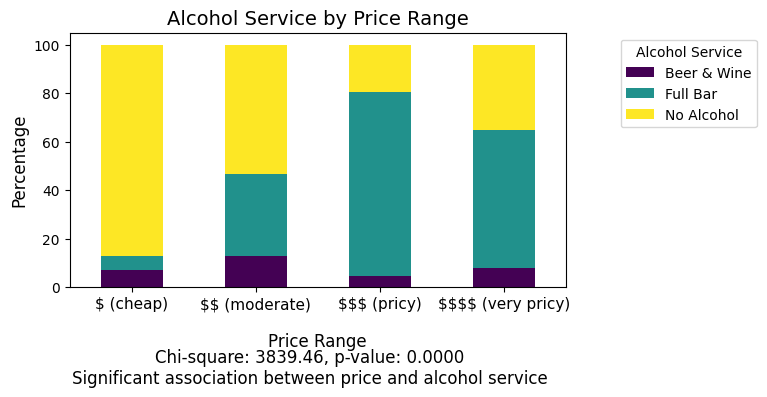

Chi-square: 3839.461
p-value: 0.000000
Degrees of freedom: 6

Contingency Table (Count):
AlcoholService         Beer & Wine  Full Bar  No Alcohol
PriceCategory                                           
$ (cheap)                      651       514        7892
$$ (moderate)                 1708      4605        7233
$$$ (expensive)                 27       448         116
$$$$ (very expensive)            6        44          27


In [18]:
restaurants = df[df['categories'].str.contains('Restaurant', na=False)]

restaurants = restaurants.dropna(subset=['RestaurantsPriceRange2', 'Alcohol'])
        
print(f"Number of restaurants: {len(restaurants)}")
print(f"Price ranges: {restaurants['RestaurantsPriceRange2'].unique()}")
print(f"Alcohol options: {restaurants['Alcohol'].unique()}")
        
restaurants['PriceCategory'] = pd.cut(
    restaurants['RestaurantsPriceRange2'], 
    bins=[0, 1.5, 2.5, 3.5, 4.5],
    labels=['$ (cheap)', '$$ (moderate)', '$$$ (expensive)', '$$$$ (very expensive)']
)

alcohol_map = {
    'none': 'No Alcohol',
    'full_bar': 'Full Bar', 
    'beer_and_wine': 'Beer & Wine'
}
restaurants['AlcoholService'] = restaurants['Alcohol'].map(alcohol_map)
        
restaurants = restaurants.dropna(subset=['PriceCategory', 'AlcoholService'])
        
cont = pd.crosstab(restaurants['PriceCategory'], restaurants['AlcoholService'])
            
chi2, p_value, dof, expected = stats.chi2_contingency(cont)
            
plt.figure(figsize=(16, 8))
            
cont_pct = cont.div(cont.sum(axis=1), axis=0) * 100
ax = cont_pct.plot(kind='bar', stacked=True, colormap='viridis')
            
plt.xlabel('Price Range', fontsize=12, labelpad=15)
plt.ylabel('Percentage', fontsize=12)
plt.title('Alcohol Service by Price Range', fontsize=14)
            
plt.legend(title='Alcohol Service', loc='upper right', bbox_to_anchor=(1.4, 1.0))
            
price_labels = ['\$ (cheap)', '\$\$ (moderate)', '\$\$\$ (pricy)', '\$\$\$\$ (very pricy)']
plt.xticks(range(len(cont_pct.index)), price_labels, rotation=0, fontsize=11)
            
plt.gca().set_xticklabels(price_labels, ha='center')
            
plt.subplots_adjust(bottom=0.35)
            
res = f"Chi-square: {chi2:.2f}, p-value: {p_value:.4f}"
if p_value < 0.05:
    res += "\nSignificant association between price and alcohol service"
else:
    res += "\nNo significant association between price and alcohol service"
            
plt.figtext(0.5, 0.15, res, ha='center', fontsize=12)
plt.show()
            
print(f"Chi-square: {chi2:.3f}")
print(f"p-value: {p_value:.6f}")
print(f"Degrees of freedom: {dof}")
print("\nContingency Table (Count):")
print(cont)

**Data Analysis**

First let's reset the index of the data

In [19]:
df.reset_index(inplace=True)

Now that the data is cleaned, it can be used for any type of model that you guys would like to create. We will be focusing on predicting the number of stars based on certain features.

Features that Jason Cleaned

ByAppointmentOnly
RestaurantsPriceRange2
WiFi
Alcohol
RestaurantsAttire
NoiseLevel
Smoking
BYOBCorkage
AgesAllowed
BusinessParking
Ambience
GoodForMeal
Music
BestNights
HairSpecializesIn
DietaryRestrictions
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday

Features used in Data Visualization

- review_count, stars
- state, stars
- Alcohol -> AlcoholService, PriceCategory, RestaurantsPriceRange2


Let's look at the datatypes of these features

In [21]:
df.dtypes

index                            int64
business_id                     object
name                            object
address                         object
city                            object
state                           object
postal_code                     object
latitude                       float64
longitude                      float64
stars                          float64
review_count                     int64
categories                      object
ByAppointmentOnly                 bool
BusinessAcceptsCreditCards        bool
BikeParking                       bool
RestaurantsPriceRange2         float64
CoatCheck                         bool
RestaurantsTakeOut                bool
RestaurantsDelivery               bool
Caters                            bool
WiFi                            object
BusinessParking                 object
WheelchairAccessible              bool
HappyHour                         bool
OutdoorSeating                    bool
HasTV                    

We will choose all the boolean type features first

In [163]:
bool_features = df.select_dtypes('bool')

Nothing needs to be done about this

Then we'll take all the categorical data where the number of unique values is less than or equal to 5

In [164]:
categorical_features = df.select_dtypes('object')
low_features_mask = categorical_features.nunique() < 5
categorical_features = categorical_features[low_features_mask[low_features_mask].index]

We'll one hot encode these

In [165]:
from sklearn.preprocessing import OneHotEncoder

In [166]:
encoder = OneHotEncoder(sparse_output=False)

encoded_data = encoder.fit_transform(categorical_features)

encoded_feature_names = []
for i, col in enumerate(categorical_features):
    for category in encoder.categories_[i]:
        encoded_feature_names.append(f"{col}_{category}")

encoded_df = pd.DataFrame(encoded_data, columns=encoded_feature_names)

Now let's see our continuous data. We'll only have the review_count and RestaurantsPriceRange2

In [167]:
continuous_features = df[['review_count', 'RestaurantsPriceRange2']]

Let's standardize them

In [168]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(continuous_features)
scaled_df = pd.DataFrame(scaled_data, columns=[f'{col}_scaled' for col in continuous_features.columns])

Now lets concatenate all the prepared data into X

In [169]:
X = pd.concat([bool_features, encoded_df, scaled_df], axis=1)

And we have our target y: 'stars'

In [179]:
y = df['stars'].apply(lambda x: 'Good' if x > 4.0 else 'Bad')

Here is the distribution of data

In [180]:
y.value_counts()

stars
Bad     54979
Good    24641
Name: count, dtype: int64

Let's split the data first

In [174]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

There are so many features that seem good to use just by inspection because they all seem to relate to how well a business can do (stars rating). That's why we'll use a decision tree to extract the most important feature. A decision tree is good for our data since a lot of our data is true/false and the one hot encoded data essentially is binary as well. There are two hyperparameters that we want to test if they'll change anything: criterion and max_depth.

Best Max Depth for gini: 9 -- Best Accuracy: 0.7096206983170058
Best Max Depth for entropy: 9 -- Best Accuracy: 0.7098718914845517
Best Max Depth for log_loss: 9 -- Best Accuracy: 0.7098718914845517


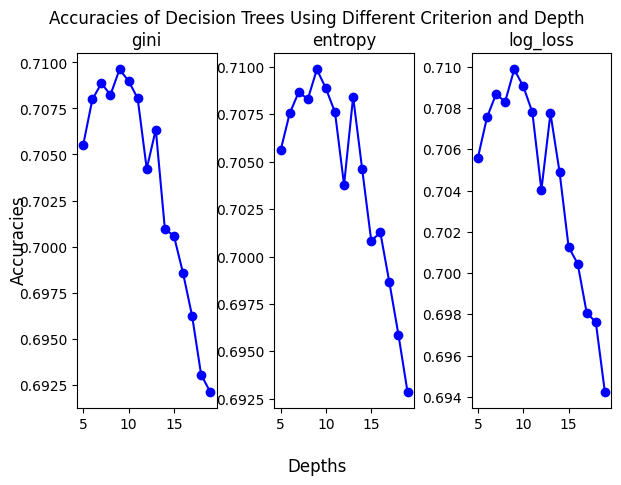

In [181]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

fig, ax = plt.subplots(1, 3, )
fig.suptitle('Accuracies of Decision Trees Using Different Criterion and Depth')
fig.supxlabel('Depths')
fig.supylabel('Accuracies')
fig.tight_layout()

for i, criterion in enumerate(['gini', 'entropy', 'log_loss']):
    ax[i].set_title(criterion)
    depths = []
    accuracies = []
    for depth in range(5,20):
        # print(f"Criterion: {criterion}, Depth: {depth}")

        dtc = DecisionTreeClassifier(criterion=criterion, max_depth=depth)
        dtc.fit(X_train, y_train)

        y_pred = dtc.predict(X_test)
        # print(classification_report(y_test, y_pred))
        accuracy = accuracy_score(y_test, y_pred)
        depths.append(depth)
        accuracies.append(accuracy)

    ax[i].plot(depths, accuracies, color='b', marker='o', linestyle='-')
    print(f"Best Max Depth for {criterion}: {depths[np.argmax(accuracies)]} -- Best Accuracy: {max(accuracies)}")

plt.show()

We see that the best max depth for all three criterion is 9 so we will use that as the best depth. As for the criterion, it doesn't seem like any one makes a difference so we'll choose 'entropy' just because we've learned that in class. Now we will make the decision tree with those actual hyperparameters.

In [182]:
criterion = 'entropy'
max_depth = 9

dtc = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth)
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         Bad       0.72      0.94      0.82     11004
        Good       0.59      0.20      0.30      4920

    accuracy                           0.71     15924
   macro avg       0.66      0.57      0.56     15924
weighted avg       0.68      0.71      0.66     15924



As we said before, we will extract the feature importances and sort them to see which ones are the most important.

In [183]:
feature_importance_df = pd.DataFrame(dtc.feature_importances_)
sorted_feature_importance = feature_importance_df.sort_values(by=0, ascending=False)
selected_features = X_train.columns[sorted_feature_importance.index]
pd.Series(selected_features)

0            RestaurantsAttire_none
1               review_count_scaled
2                 ByAppointmentOnly
3     RestaurantsPriceRange2_scaled
4              WheelchairAccessible
5               RestaurantsDelivery
6                  Alcohol_full_bar
7                       BikeParking
8                         WiFi_none
9                         DriveThru
10                      GoodForKids
11                      DogsAllowed
12                            HasTV
13                          WiFi_no
14               RestaurantsTakeOut
15                 AcceptsInsurance
16       BusinessAcceptsCreditCards
17                           Caters
18                        WiFi_free
19         RestaurantsGoodForGroups
20          RestaurantsTableService
21                   OutdoorSeating
22           BusinessAcceptsBitcoin
23                        WiFi_paid
24                 BYOBCorkage_none
25            Alcohol_beer_and_wine
26                   BYOBCorkage_no
27                        Ha

What's better than a decision tree. A forest of them. That's what random forest does. We'll use this type of model now to first see how many features we should select. We'll keep the same hyperparameters as the decision tree.

In [190]:
from sklearn.ensemble import RandomForestClassifier

for i in range(6, len(selected_features), 5):
    rfc = RandomForestClassifier(criterion=criterion, max_depth=max_depth)
    rfc.fit(X_train[selected_features[0:i]], y_train)

    y_pred = rfc.predict(X_test[selected_features[0:i]])
    print("Number of Features:", i)
    print(classification_report(y_test, y_pred))

Number of Features: 6
              precision    recall  f1-score   support

         Bad       0.71      0.96      0.82     11004
        Good       0.57      0.13      0.21      4920

    accuracy                           0.70     15924
   macro avg       0.64      0.54      0.51     15924
weighted avg       0.67      0.70      0.63     15924

Number of Features: 11
              precision    recall  f1-score   support

         Bad       0.72      0.96      0.82     11004
        Good       0.63      0.16      0.26      4920

    accuracy                           0.71     15924
   macro avg       0.67      0.56      0.54     15924
weighted avg       0.69      0.71      0.65     15924

Number of Features: 16
              precision    recall  f1-score   support

         Bad       0.72      0.96      0.82     11004
        Good       0.64      0.15      0.24      4920

    accuracy                           0.71     15924
   macro avg       0.68      0.56      0.53     15924
weight

The least amount of features needed with a decently high accuracy score is 11. Again, let's get the actual random forest model with these hyperparameters.

In [191]:
min_features = 11

rfc = RandomForestClassifier(criterion=criterion, max_depth=max_depth)
rfc.fit(X_train[selected_features[0:min_features]], y_train)

y_pred = rfc.predict(X_test[selected_features[0:min_features]])
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         Bad       0.72      0.96      0.82     11004
        Good       0.63      0.16      0.26      4920

    accuracy                           0.71     15924
   macro avg       0.67      0.56      0.54     15924
weighted avg       0.69      0.71      0.65     15924



**Results and Visualizations**

**Insights and Conclusions**